## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Fall 2019


# Project - Social Corps

## Corporate Social Responsibility Report

### Part 1. PDF Crawler


In [2]:
from bs4 import BeautifulSoup
import wget
import csv
import requests
import pandas as pd

data = pd.read_csv('fortune_1000.csv')
companies = data['Company Name'].to_numpy()
companies

array(['Walmart', 'Exxon Mobil', 'Apple', 'Berkshire Hathaway',
       'Amazon.com', 'UnitedHealth Group', 'McKesson', 'CVS Health',
       'AT&T', 'AmerisourceBergen', 'Chevron', 'Ford Motor',
       'General Motors', 'Costco Wholesale', 'Alphabet',
       'Cardinal Health', 'Walgreens Boots Alliance', 'JPMorgan Chase',
       'Verizon Communications', 'Kroger', 'General Electric',
       'Fannie Mae', 'Phillips 66', 'Valero Energy', 'Bank of America',
       'Microsoft', 'Home Depot', 'Boeing', 'Wells Fargo', 'Citigroup',
       'Marathon Petroleum', 'Comcast', 'Anthem', 'Dell Technologies',
       'DuPont de Nemours', 'State Farm Insurance', 'Johnson & Johnson',
       'IBM', 'Target', 'Freddie Mac', 'United Parcel Service', "Lowe's",
       'Intel', 'MetLife', 'Procter & Gamble', 'United Technologies',
       'FedEx', 'PepsiCo', 'Archer Daniels Midland',
       'Prudential Financial', 'Centene', 'Albertsons', 'Walt Disney',
       'Sysco', 'HP', 'Humana', 'Facebook', 'Caterpillar',

In [ ]:
import os

"""
Give the request lib a link to a Google search (manually with get requests (static url) or post)
Use BS4 to scrape the page for all links
Use a for loop on a find_all and run a wget on their url.
filter by PDF i.e. in google Search string + filetype:pdf
"""
for i in range(363, len(companies)):
    company = companies[i]
    url = "https://www.google.com/search?q=social+responsibility+"+company+"&as_filetype=pdf"
    r = requests.get(url)
    html = r.content
    soup = BeautifulSoup(html, 'lxml')
    print('running?')
    print(i)
    print(r.status_code)

    for a in soup.find_all('a', href=True):
        if ".pdf" in a['href']:
            str_result = a['href']
            # just "pdf" includes all google search results because "filetype=pdf" is included in url
            # but adding a dot in front, ".pdf", solved this problem
            start = 0
            end = 0
            for i in range(len(str_result)-5):
                if str_result[i:i+4] == 'http':
                    start = i
                    break
            for i in range(start+5, len(str_result)):
                if str_result[i:i+4] == '.pdf':
                    end = i+4
                    break
            report = str_result[start:end]
            fileDir = os.path.dirname(os.path.realpath('__file__'))
            if not os.path.exists(fileDir+'/csr_data/'):
                csr_data = os.path.join(fileDir+'/csr_data/')
                os.makedirs(csr_data)
            if not os.path.exists(fileDir+'/csr_data/'+company):
                company_dir = os.path.join(fileDir+'/csr_data/'+company)
                os.makedirs(company_dir)
                
            try:
                filename = wget.download(report, company_dir)
                # Prevent duplicate downloads
                if filename[-7:-4] == '(1)':
                    delete_path = os.path.join(company_dir, filename)
                    os.remove(delete_path)
                    print("File already exists")
            except:
                # Catch HTTP Errors such as 403 Forbidden
                pass

### Part 2. PDF to TXT converter

In [1]:
import os, sys, PyPDF2
path = os.path.dirname(os.path.realpath('__file__'))
dirs = os.listdir(path + "/csr_data/")
for folder in dirs:
    if folder == ".DS_Store":
        continue
    sub_dirs = os.listdir(path + "/csr_data/" + folder)
    for file in sub_dirs:
        if file == ".DS_Store":
            continue
        file_path =  path + "/csr_data/" + folder + "/" + file
        if file_path[-4:] != '.pdf':
            continue
        file_pdf = open(file_path, 'rb')        
        # creating a pdf reader object
        try:
            fileReader = PyPDF2.PdfFileReader(file_pdf)
        except:
            continue
        try:
            total_pages = fileReader.numPages
        except:
            continue
        text = ""
        error = False
        for k in range (total_pages):
            page = fileReader.getPage(k)
            try:
                t = page.extractText()
            except:
                error = True
                break
            text = text + t
        if error:
            continue
        if not os.path.exists(path+'/csr_data_txt/'+folder):
            new_folder = os.path.join(path+'/csr_data_txt/'+folder)
            os.makedirs(new_folder)
        make_file_path = path + "/csr_data_txt/" + folder + "/" + file
        txt_path = make_file_path[:-4]+".txt"
        print('Saving...')
        print (txt_path)
        f = open(txt_path, "a")
        f.write(text)
        f.close()

hello


Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Lockheed Martin/Lockheed_Martin_Sustainability_Report_Executive_Summary_2017.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Lockheed Martin/2014-energy-water-waste-conference-united-states-postal-service-lockheed-martin-case-studies-on-energy-waste-and-water-naem.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Lockheed Martin/sustainability-report-2016-web.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Lockheed Martin/a556558.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Lockheed Martin/Lockheed_Martin_Sustainability_Report_Full_2018.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Lockheed Martin/Lockheed_Martin_Sustainability_Report_Full_2017.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Lockheed Martin/lmt_courtesy-pdf.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Cardinal Health/cardinal-he

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/DXC Technology/SP190025_DXC.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/DXC Technology/2016_CSC_Corporate_Responsibility_Report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/DXC Technology/ethical-digital-study-tour-agenda.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/DXC Technology/NYSE_DXC_2018.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/DXC Technology/Corporate-Responsibility-Report-2018.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Marathon Petroleum/MPC_Code_of_Business_Conduct_2018.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Marathon Petroleum/2018_Climate_Related_Scenarios.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Marathon Petroleum/Sustainability_Report_10_3.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Marathon Petroleum/lov_report_2012_final.txt
Sa

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/VF/DohenyM_17_6_.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/VF/Akesson_Taru.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/VF/VF.CSR_.7-2019.web_.FINAL_-2.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Synnex/14005390.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Synnex/SYNNEX-Corporation-Proxy-Statement-eProof-2-2-18-19-PM-200.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Synnex/11005009.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/NextEra Energy/codeofbusinessconductandethics.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/NextEra Energy/Executive_Digest_Final.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/NextEra Energy/2011_sustain_report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/NextEra Energy/sustain-report.txt
Saving...
/Users/jeesubyun/D

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Liberty Mutual Insurance Group/liberty-mutual-annual-report-2017.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Liberty Mutual Insurance Group/PropertyCasualtyRetailBankingOnlineBanking.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Liberty Mutual Insurance Group/Liberty-Mutual-Annual-web-ready.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Liberty Mutual Insurance Group/liberty-life-variable-prospectus.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Liberty Mutual Insurance Group/2018_Investor_Day.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Liberty Mutual Insurance Group/FinEIOWCmFS-200000914.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Liberty Mutual Insurance Group/1809mutualfactor.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Liberty Mutual Insurance Group/Liberty-Mutual-Prospectus-11-

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Phillips 66/code.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Phillips 66/CSR-8-page-Brochure-2017-single-pages-FINAL.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Phillips 66/sustainability-brochure-print.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Phillips 66/Sustainability-Brochure-2018.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Phillips 66/3qtr13_spirit-magazine.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Phillips 66/Sustainability-Brochure-2017.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Phillips 66/Sustainability-Ch8.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Phillips 66/Sustainability-Report-2019.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/D.R. Horton/patrickmissudhorton110113-14a8.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/HP/hp_csr_full_hi_tcm_245_1357664.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/HP/ngsr-charter-2019-july-2019.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/HP/c06293935.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/HP/toward-more-responsible-supply-chain-0809.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/FedEx/FedEx_GCR131.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/FedEx/FedEx_GCR121.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/FedEx/FedEx_GCR141.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/FedEx/FedEx_GCR_FINAL_4.17.19_144dpi.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/FedEx/FedEx_2017_Global_Citizenship_Report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/FedEx/FedEx_2018_Global_Citizenship_Report.txt
Saving...
/Users/jeesubyun/Downloads/

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Cummins/cumminssynthese.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Hewlett Packard Enterprise/c05968415.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Hewlett Packard Enterprise/gourevitch_cs_hur.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Hewlett Packard Enterprise/prospectus-hewlett-packard-enterprise-company-stock-plan.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Hewlett Packard Enterprise/9e4d3db4989957370a4686e6d4653c04f0ce.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Hewlett Packard Enterprise/hp_csr_full_hi_tcm_245_1357664.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Becton Dickinson/BD_Sustainability-Performance-Update-2017_EN.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Becton Dickinson/BD_Sustainability-Report-2016_EN.txt
Saving...
/Users/jeesubyun/Downloads/676/project

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Henry Schein/JACD-81-1-pgs41-45-press.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Henry Schein/18CC9340_Pages_Vfin_nc.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Wells Fargo/GATX_CSR_Committee_Charter_2018_11_10.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Wells Fargo/2018-corporate-responsibility-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Wells Fargo/2015-social-responsibility-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Wells Fargo/2017-social-responsibility-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Wells Fargo/2013-social-responsibility-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Wells Fargo/Wells-Fargo-Proxy-Memo_-Solicitation-3-28-17-FINAL.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Wells Fargo/CSR_IN_AMERICAN_BANKING_

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Morgan Stanley/esg-approach-and-principles-us.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Deere/Support-of-Human-Rights-in-Our-Business-Practices_2017.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Deere/domesticforeignmissionary111312-14a8.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Deere/global_citizenship_report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Deere/JD_GCR_2017_F-web.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Deere/Deere_Strategic_Plan.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Deere/jd-india-csr-policy.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Deere/OurGuidingPrinciples_English.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Deere/2015-2016-CSSR-LR.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/PayPal Holdings/2017511_r0

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Omnicom Group/Omnicom-Group-2016-Corporate-Responsibility-Report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Omnicom Group/061516_Omnicom_FinalDraft_2.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Omnicom Group/KSR-REPORT.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Omnicom Group/rep-rethinking-corporate-social-responsibility-fleishman-2007.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Omnicom Group/PubGpe_CSRReport_2014.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Omnicom Group/073018_Final_Omnicom_Layout.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/WellCare Health Plans/WellCare_2017_Annual_Review.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/WellCare Health Plans/WellCare_2016_Annual_Review.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Broadcom/Broadcom-2018-A

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/International Paper/emeaep2013en.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/International Paper/supplier-handbook.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/International Paper/2016-gc-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/International Paper/gc-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/International Paper/2014_sust_full-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/International Paper/4_3_285_wcsdg-wp-27.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Newell Brands/CoC_EMEA.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Newell Brands/NR-SustainabilityBrochure-PF.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Newell Brands/SustainabilityReport2017.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Newell Brands/NWL-res

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Walmart/topten-walmartsustainability.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Walmart/csr-policy.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Walmart/corporate-social-responsibility-report-published-july-2012.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Walmart/wmt-2017-grr-report-final.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Berkshire Hathaway/ethics.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Berkshire Hathaway/Hanson-2013-Journal_of_Applied_Corporate_Finance_s6WINu1.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Berkshire Hathaway/BerkshireHathaway_Memo_041309.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Berkshire Hathaway/Sustainability-performance-The-method-of-reporting-by-International-companies.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Berks

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/JPMorgan Chase/jpmc_crr08.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/JPMorgan Chase/2017-jpmorgan-chase-cr-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/JPMorgan Chase/2016-JPMorgan-Chase-CR-Report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/JPMorgan Chase/220591_JPMC_Summary_Report_aw_linked_v2_ada.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/JPMorgan Chase/final-jpmc-cr-2019.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/JPMorgan Chase/jpmc-cr-esg-report-2018.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/JPMorgan Chase/jpm_corpresp091912_hires.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Netflix/netflix_culture.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Netflix/CSR%2BMEMO%2BWEBSITE.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Net

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/TIAA/RI_practice_management_guidebook_377920_535605_083115.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/TIAA/ri_delivering_competitive_performance.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/TIAA/socialresponsibilitycharter.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Performance Food Group/9ea24c9c8584eaa5e573864978289b6ebbef.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Performance Food Group/Sysco_2018_CSR.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Performance Food Group/KHC_CSR_2017_Full.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Southwest Airlines/ChristiMcNeill.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Southwest Airlines/20060046466.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Southwest Airlines/c07b4c4f27a6001bcec7c9cf6fdc1822902a.txt
Saving...
/

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Philip Morris International/pmi-sustainability-report-2018-low-res.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Philip Morris International/e22c9ff113f863079762ccfa2ed9b8f2ded8.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/BlackRock/blk-annual-stewardship-report-2018.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/BlackRock/blk-annual-stewardship-report-2019.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/BlackRock/socially-responsible-fund.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/BlackRock/blk-responsible-investment-guidelines-us.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/BlackRock/blk-sustainability-mission-statement-web.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/BlackRock/blk-esg-investment-statement-web.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/BlackRo

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Waste Management/71ce7623b3e5876a20bb932bebfb5e2b140e.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Waste Management/WasteManagement_SustainabilityReport_2018.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Waste Management/0724a3d19cca625e45196a54b908262490ee.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Waste Management/192.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Waste Management/Roadmap_Appendices.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/CVS Health/2016-summary-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Honeywell International/irsHONEYWELLa2014ieng.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Honeywell International/Best-Practices-In-Corporate-Social-Responsibility-2015.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Honeywell International/azzada

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Bank of New York Mellon/2018-csr-report-overview.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Bank of New York Mellon/2012-csr-full-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Bank of New York Mellon/bny-mellon-diversity-and-inclusion-strategy.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Bank of New York Mellon/2018-csr-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Union Pacific/omhq10b29811006339.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Union Pacific/business_conduct.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/AbbVie/abbv_mercyinvestmentservices_3.27.18.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/AbbVie/abbvie-materialityassessment-2018.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/AbbVie/AbbVie-Supplier-Sustainability-Survey.txt
Saving...


Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Procter & Gamble/csr_guide.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Procter & Gamble/PGHH-CSR-Policy.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Procter & Gamble/IJBRM-125.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Procter & Gamble/english_sustainability.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Procter & Gamble/dbp_csr_paper_final_-_corporate_social_responsibility_and_di-_a_critical_partnership.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Procter & Gamble/csr13_14.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Northrop Grumman/2016-noc-cr-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Northrop Grumman/2007-noc-csr-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Northrop Grumman/2013-noc-cr-report.txt
Saving...
/Users/jeesubyun/Downloads/676/p

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Cisco Systems/CSR-Report-2016-story.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Cisco Systems/Pillar_Environment.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Cisco Systems/CSR-Report-2018.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Cisco Systems/CSR_Report_2005.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Cisco Systems/Pillar_GovernanceEthics.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Cisco Systems/CSR-Report-Our-Story-2018.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Cisco Systems/CSR_Report_2013.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Cisco Systems/CSR-Report-2016.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Cisco Systems/CSR-Report-2017.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Cisco Systems/CSR_Report_2015.txt
Saving...
/Us

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Kimberly-Clark/kimberly-clark-investing.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/UnitedHealth Group/SR-Report-2018-Q4.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/UnitedHealth Group/UHG-2018-SR-report-Q2.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/UnitedHealth Group/SR-Report-2018-Q3.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/UnitedHealth Group/UNH-2015-Social-Responsibility-Report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/UnitedHealth Group/UNH-2013-Social-Responsibility-Report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/UnitedHealth Group/UNH-2014-Social-Responsibility-Report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/UnitedHealth Group/davidridenour021417-14a8.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/UnitedHealth Group/UHG_SRreport_2017.txt

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Ecolab/Ecolab_2016_GRI_Final_pdf.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Ecolab/20100416obianyo.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Ecolab/Policy_CodeOfConduct_pdf.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Goodyear Tire & Rubber/gy-business-conduct-manual.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Goodyear Tire & Rubber/ctsc-credit-appl-01-17.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Goodyear Tire & Rubber/Goodyear_Tire_and_Rubber_2018_Corporate_Responsibility_Report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Goodyear Tire & Rubber/2016-gri-index-and-full-text.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Goodyear Tire & Rubber/NYSE_GT_2003.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Goodyear Tire & Rubber/2018-corporate-responsibility-

Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/U.S. Bancorp/2018-fifth-third-bank-annual-corporate-responsibility-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Hartford Financial Services/sustainability-highlight-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Hartford Financial Services/corporate-responsibility.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Hartford Financial Services/hartford.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Hartford Financial Services/hartfordproxy2017.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Hartford Financial Services/gri-g4-matrix.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Eli Lilly/integrated-report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Eli Lilly/2014_Corporate_Responsibility_Report.txt
Saving...
/Users/jeesubyun/Downloads/676/project/csr_data_txt/Eli Lilly/mercyuaw03021

### Part 3. TXT cleaning

In [2]:
import os, sys, re, string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

path = os.path.dirname(os.path.realpath('__file__'))
dirs = os.listdir(path + "/csr_data_txt/")
table = str.maketrans('', '', string.punctuation)
for folder in dirs:
    if folder == ".DS_Store":
        continue
    sub_dirs = os.listdir(path + "/csr_data_txt/" + folder)
    for file in sub_dirs:
        if file == ".DS_Store":
            continue
        file_path =  path + "/csr_data_txt/" + folder + "/" + file
        file_txt = open(file_path, 'rt')
        text = file_txt.read()
        file_txt.close()
        tokens = word_tokenize(text)
        
        # convert to lower case
        tokens = [w.lower() for w in tokens]
        
        # remove punctuation from each word
        stripped = [w.translate(table) for w in tokens]
        
        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]
        
        # filter out stop words
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words]
        words = [w for w in words if not len(w) <= 3]
        
        # Stemming
        # porter = PorterStemmer()
        # stemmed = [porter.stem(word) for word in words]
        stemmed = words
        
        # ł , œ appear frequently. 
        if not os.path.exists(path+'/csr_data_cleaned/'+folder):
            new_folder = os.path.join(path+'/csr_data_cleaned/'+folder)
            os.makedirs(new_folder)
        make_file_path = path + "/csr_data_cleaned/" + folder + "/" + file
        string = ' '.join(stemmed)
        f = open(make_file_path, "w")
        f.write(string)
        f.close()
        
# Remove line breaks.
# Remove extra spaces (only one space between words)
# Remove Non-alphabets
# Lowercase all
# Remove stop words

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/jeesubyun/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-567527014219>", line 20, in <module>
    tokens = word_tokenize(text)
  File "/Users/jeesubyun/anaconda3/lib/python3.7/site-packages/nltk/tokenize/__init__.py", line 146, in word_tokenize
    token for sent in sentences for token in _treebank_word_tokenizer.tokenize(sent)
  File "/Users/jeesubyun/anaconda3/lib/python3.7/site-packages/nltk/tokenize/__init__.py", line 146, in <listcomp>
    token for sent in sentences for token in _treebank_word_tokenizer.tokenize(sent)
  File "/Users/jeesubyun/anaconda3/lib/python3.7/site-packages/nltk/tokenize/treebank.py", line 140, in tokenize
    text = regexp.sub(substitution, text)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users

KeyboardInterrupt: 

In [ ]:
# Remove all words that occur only three times?
import os, sys
path = os.path.dirname(os.path.realpath('__file__'))
dirs = os.listdir(path + "/csr_data_cleaned/")
counts = dict()
for folder in dirs:
    if folder == ".DS_Store":
        continue
    sub_dirs = os.listdir(path + "/csr_data_cleaned/" + folder)
    for file in sub_dirs:
        if file == ".DS_Store":
            continue
        file_path =  path + "/csr_data_cleaned/" + folder + "/" + file
        file_txt = open(file_path, 'rt')
        text = file_txt.read()
        words = text.split()
        for word in words:
            if word not in counts:
                counts[word] = 0
            counts[word] = counts[word]+1
        file_txt.close()
# A lot of words only have counts less than 3!
for word in counts:
    if counts[word] <= 3:
        print(word, '->', counts[word])

In [47]:
# Our CountVectorizer size will be too big.
print(len(counts))

394151


In [45]:
# Remove company names themselves
import os, sys
path = os.path.dirname(os.path.realpath('__file__'))
dirs = os.listdir(path + "/csr_data_cleaned/")
company_name_set = set()
for folder in dirs:
    if folder == ".DS_Store":
        continue
    company_name_set.add(folder.split()[0])

In [89]:
import os, sys
path = os.path.dirname(os.path.realpath('__file__'))
dirs = os.listdir(path + "/csr_data_cleaned/")
for folder in dirs:
    if folder == ".DS_Store":
        continue
    sub_dirs = os.listdir(path + "/csr_data_cleaned/" + folder)
    company_text = []
    for file in sub_dirs:
        if file == ".DS_Store":
            continue
        file_path =  path + "/csr_data_cleaned/" + folder + "/" + file
        file_txt = open(file_path, 'rt')
        text = file_txt.read()
        words = text.split()
        for word in words:
            if len(word) > 14:
                continue
            if word in company_name_set:
                continue
            if word == 'kroger' or word == 'intel' or word == 'cisco' \
            or word == 'japan' or word == 'http' or word == 'fedex' \
            or word == 'fannie' or word == 'oracle' or word == 'nigeria' \
            or word == 'walmart' or word == 'abbott' or word == 'valero' \
            or word == 'schein' or word == 'henry' or word == 'antonio' \
            or word == 'whirlpool' or word == 'adecco' or word == 'westrock' \
            or word == 'arcelormittal' or word == 'morgan' or word == 'jpmorgan' \
            or word == 'walgreens' or word == 'tenneco' or word == 'jcpenney':
                continue
            if counts[word] > 3:
                company_text.append(word)
        file_txt.close()
    make_file_path = path + "/csr_data_lda/" + folder + ".txt"
    f = open(make_file_path, "w")
    f.write(' '.join(company_text))
    f.close()

### Part 4. TXT to CountVectorizer

In [90]:
import os, sys
path = os.path.dirname(os.path.realpath('__file__'))
dirs = os.listdir(path + "/csr_data_lda/")
corpus = []
for file in dirs:
    if file == ".DS_Store":
        continue
    file_path =  path + "/csr_data_lda/" + file
    file_txt = open(file_path, 'rt')
    text = file_txt.read()
    corpus.append(text)
    file_txt.close()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray()) 

### Part 5. LDA

In [99]:
tf_feature_names = vectorizer.get_feature_names()

# Run LDA
lda = LatentDirichletAllocation(4, max_iter=30, learning_method='online', learning_offset=50.,random_state=0).fit(X)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic" +str(topic_idx) + ":")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

Topic0:
energy water emissions team sustainability suppliers chain waste governance percent
Topic1:
fund proposal investment securities continued shares agreement interest manager assets
Topic2:
food care sustainability research code project plan marketing state international
Topic3:
income insurance reinsurance assets investment interest stock cash fair life


In [100]:
no_top_words = 30
display_topics(lda, tf_feature_names, no_top_words)

Topic0:
energy water emissions team sustainability suppliers chain waste governance percent human diversity world training technology sustainable supplier society conduct goal approach goals leadership index fuel economic scope international power education
Topic1:
fund proposal investment securities continued shares agreement interest manager assets stock statement shareholder director shall rule date period expenses committee funds laws state investments applicable section loss shareholders corporation federal
Topic2:
food care sustainability research code project plan marketing state international stakeholders natural implementation firms study consumers projects foundation economic ethics family benefits journal guide date firm paper ethical children school
Topic3:
income insurance reinsurance assets investment interest stock cash fair life securities capital consolidated december statements plan compensation credit certain rate operating equity amount liabilities changes losses pe

In [101]:
doc_topic_dist = lda.transform(X)

In [ ]:
import pandas as pd 
pd.DataFrame(doc_topic_dist).to_csv(os.path.dirname(os.path.realpath('__file__')) + "/" + "topic_distribution.csv")

In [4]:
import os, sys
path = os.path.dirname(os.path.realpath('__file__'))
dirs = os.listdir(path + "/csr_data_lda/")
companies = []
for file in dirs:
    if file == ".DS_Store":
        continue
    companies.append(file[:-4])

In [5]:
import numpy as np
pd.DataFrame(np.array(companies)).to_csv(os.path.dirname(os.path.realpath('__file__')) + "/" + "index_to_company_name.csv")

### Part 6. Clustering

In [38]:
import pandas as pd
import numpy as np
data = pd.read_csv('topic_distribution.csv')
industries = pd.read_csv('fortune1000-final.csv', encoding="ISO-8859-1")
index = pd.read_csv('index_to_company_name.csv')
data.rename( columns={'Unnamed: 0':'index'}, inplace=True )
index.rename( columns={'Unnamed: 0':'index'}, inplace=True )
index.rename( columns={'0':'Name'}, inplace=True )

In [39]:
industries.rename( columns={'title':'Name'}, inplace=True)

In [87]:
print(industries['Sector'].nunique())

21


In [41]:
data = data.merge(index, on='index')

In [42]:
data = data.merge(industries, on='Name', how='left')


In [ ]:
data['Name'].loc[data['Sector'] == 'Energy']

In [46]:
unique_industry = data['Sector'].unique()
print(data['Sector'].nunique())

21


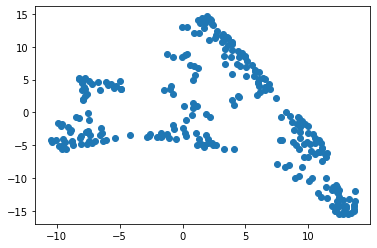

In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
matrix = np.asarray([data['0'],data['1'],data['2'], data['3']]).T
matrix.shape

X_embedded = TSNE(n_components=2).fit_transform(matrix)

plt.scatter(X_embedded[:, 0],X_embedded[:, 1])


In [ ]:
import numpy as np
from sklearn import preprocessing
scatter_x = X_embedded[:, 0]
scatter_y = X_embedded[:, 1]
# group = np.array(data['Sector'])
cdict = dict()
group = np.array(data['Sector'])
for industry in unique_industry:
    if industry == 'Chemicals':
        cdict[industry] = np.array([0,0,0])
    elif industry not in cdict:
        cdict[industry] = np.random.rand(3,)

"""
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=column.min, vmax=column.max)

fig, ax = plt.subplots()
ax.bar(df.x, df.y, color=cmap(norm(df.c.values)))
ax.set_xticks(df.x)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # only needed for matplotlib < 3.1
fig.colorbar(sm)
"""

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
for industry in unique_industry:
    if industry == 'Financials' or industry == 'Industrials'\
        or industry == 'Business Services' or industry == 'Energy'\
        or industry == 'Health Care' or industry == 'Retailing'\
        or industry == 'Food, Beverages &  Tobacco' or industry == 'Materials'\
        or industry == 'Engineering &  Construction' or industry == 'Aerospace &  Defense'\
        or industry == 'Motor Vehicles & Parts' or industry == 'Wholesalers'\
        or industry == 'Household Products':
        continue
    ix = np.where(group == industry)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[industry], label = industry, s = 50)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Topic 0')
plt.ylabel('Topic 2')
plt.savefig("./sector_scatter.jpeg", dpi=1200)
plt.show()


Media
Apparel
Transportation
Telecommunications
Technology
Food &  Drug Stores
nan
Motor Vehicles &  Parts
Chemicals
Hotels, Restaurants &  Leisure


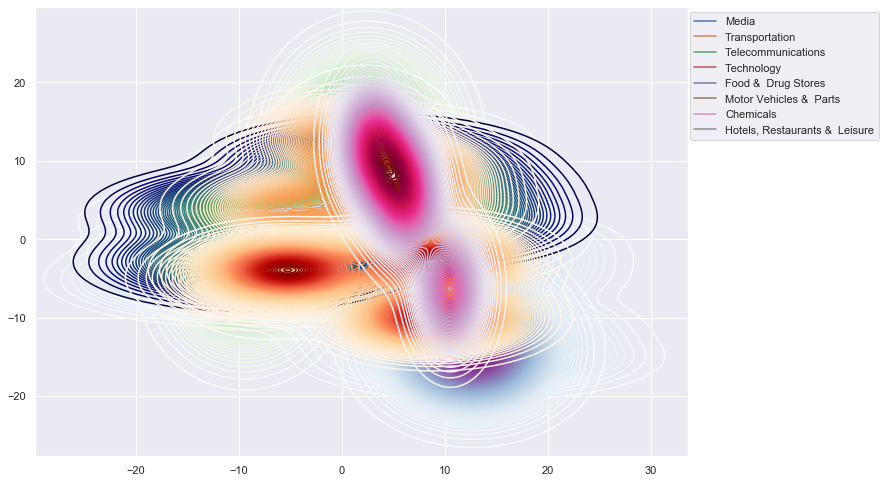

In [187]:
color_list = ['Greens', 'Blues', 'BuGn', 'BuPu', 'gist_earth', 'Oranges', 'OrRd', 'PuRd', 'Reds', 'YIGn']
color_idx = 0
#another sector
import seaborn as sns
import matplotlib
sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax = plt.subplots()
for industry in unique_industry:
    if industry == 'Financials' or industry == 'Industrials'\
        or industry == 'Business Services' or industry == 'Energy'\
        or industry == 'Health Care' or industry == 'Retailing'\
        or industry == 'Food, Beverages &  Tobacco' or industry == 'Materials'\
        or industry == 'Engineering &  Construction' or industry == 'Aerospace &  Defense'\
        or industry == 'Motor Vehicles & Parts' or industry == 'Wholesalers'\
        or industry == 'Household Products':
        continue
    ix = np.where(group == industry)
    X_list_x = X_embedded[ix[0].tolist(), 0]
    X_list_y = X_embedded[ix[0].tolist(), 1]
    if len(X_list_x) <= 2:
        continue
    sns.kdeplot(X_list_x, X_list_y, n_levels=100,cmap=color_list[color_idx], shade=False, shade_lowest=False, label=industry)
    color_idx += 1
    ax.legend(bbox_to_anchor=(1.3, 1), loc='upper right', ncol=1)


In [ ]:
sentiments = pd.read_csv('./index_to_company_name_df.csv')
sentiments['Name'] = sentiments['0']
sentiments


In [154]:
data = data.merge(sentiments, on='Name')

In [ ]:
# Make the plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(20)
ax = fig.gca(projection='3d')
ax.plot_trisurf(scatter_y, scatter_x, data['sentiment'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

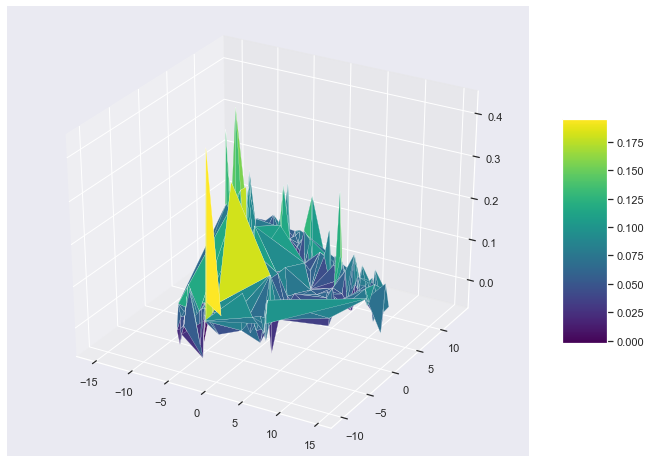

In [177]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(scatter_y, scatter_x, data['sentiment'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
# Rotate it
ax.view_init(-100000000,100)
plt.show()
# Other palette

ax.plot_trisurf(scatter_y, scatter_x, data['sentiment'], cmap=plt.cm.jet, linewidth=0.001)
plt.show()